<p style="font-family: Arial; font-size:2.2em;color:blue; font-style:bold"><br>
Построение модели классификатора рукописных цифр
</p><br>

Целью данного блокнота является построение и сравнение разных моделей классификации рукописных цифр.<br>
Для сравнения будут взяты модели **К ближайщих соседей** и модель нейронной сети  многослойного персептона **(MLP)** из библиотеки **scikitlearn**

Задача распознавания и классификации фотографий является довольно сложной, так как  каждая картинка рассматривается как 
набор пикселей,<br> которых в картинках с большим разрешением может быть огромное множество (*например 7,990,272 пикселей в фото с разрешением 3264 к 2448*)<br><br>
Поэтому для более быстрой обработки размерность снижается до 64 или 128 пикселей, однако при этом теряются детали картинок.<br>
С другой стороны каждый пиксель представляется как оттенок серого цвета в диапазоне от 0 до 256 <br>и не имеет явной линейной или нелинейной зависимости с целевой переменной

In [1]:
#импортируем основные модули
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#выгружаем данные содержащие рукописные цифры в формате пикселей
digits_data = load_digits()

In [2]:
digits_data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

Набор представляет из себя словарь,где по ключу хранятся набор признаков и целевая переменная

In [3]:
# Назначаем переменным значения признаков и целевой переменной
features = pd.DataFrame(digits_data['data'])
targets = pd.Series(digits_data['target'])

In [4]:
#Посмотрим на наши данные
features.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Как видно каждое наблюдение в наборе представляет собой набор пикселей длинной в **64** элемента<br>
Чтобы представить каждое наблюдении в виде картинки, необходимо переоформить каждое наблюдение в виде **(8*8)**<br>
Для этого воспользуемся библиотекой **matplotlib** и **numpy** 


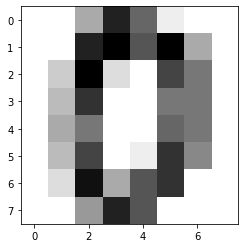

In [6]:
#Выберем первое наблюдение и визуализируем его
first_image = features.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

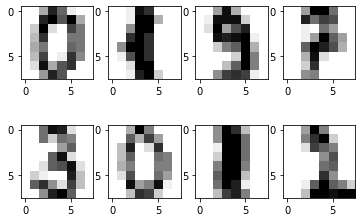

In [7]:
#Сделаем то же самое для нескольких разных наблюдений
f, ax = plt.subplots(2,4)
ax[0,0].imshow(features.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0,1].imshow(features.iloc[99].values.reshape(8,8), cmap='gray_r')
ax[0,2].imshow(features.iloc[199].values.reshape(8,8), cmap='gray_r')
ax[0,3].imshow(features.iloc[299].values.reshape(8,8), cmap='gray_r')

ax[1,0].imshow(features.iloc[999].values.reshape(8,8), cmap='gray_r')
ax[1,1].imshow(features.iloc[1099].values.reshape(8,8), cmap='gray_r')
ax[1,2].imshow(features.iloc[1199].values.reshape(8,8), cmap='gray_r')
ax[1,3].imshow(features.iloc[1299].values.reshape(8,8), cmap='gray_r')

In [8]:
import warnings
warnings.filterwarnings('ignore')

<p style="font-family: Arial; font-size:2em;color:blue; font-style:bold"><br>
Модель К ближайщих соседей
</p><br>

Так как признаки не имеют явной линейной зависимости с целевой переменной, то задачу классификации стоит начать с метода 
K ближайщих соседей.
Попробуем построить модель с разным количеством соседей и воспользуемся кросвалидацией для борьбы с переобучением

In [9]:
# Установим диапазон соседей от 1 до 10 с количеством фолдов равного 4.
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy_ar = cross_val_score(knn, features,targets, cv=3)
    knn_scores.append(np.mean(accuracy_ar))

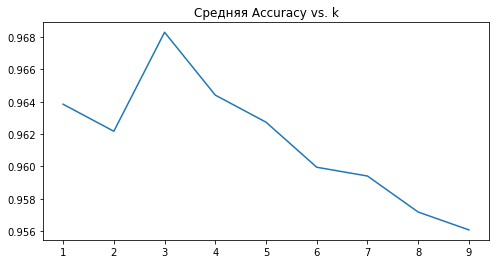

In [10]:
#Посмотрим на графике среднюю accuracy в зависимости от количества соседей
plt.figure(figsize=(8,4))
plt.title("Средняя Accuracy vs. k")
plt.plot(list(range(1,10)), knn_scores)

**Вывод**<br>
Судя по графику метод К ближайщих соседей при правильно подобранном количестве соседей, довольно неплохо справляется с задачей<br> 
классификации, однако сам по себе метод не является математической моделью, так как предсказывает значения, опираясь на весь 
тренировочный сет.

<p style="font-family: Arial; font-size:2em;color:blue; font-style:bold"><br>
Нейронная сеть с одним скрытым слоем
</p><br> 

Импортируем модель многослойного персептона(MLP) нейронной сети из библиотеки scikitlear
и построим модель с разным количеством нейронов в скрытом слое.

In [12]:
#Установим количество нейронов от 8 до 256, с тем же количеством фолдов в кросс-валидации
from sklearn.neural_network import MLPClassifier
neurons = [8, 16, 32, 64, 128, 256]
nn_one_accuracy = []
for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,))
    accuracy_ar = cross_val_score(mlp, features,targets, cv=4)
    nn_one_accuracy.append(np.mean(accuracy_ar))

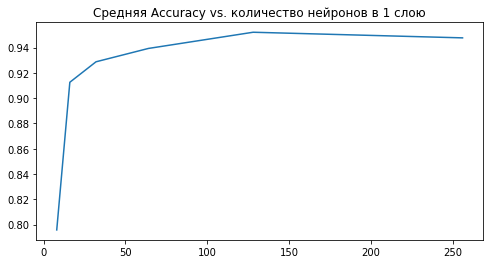

In [13]:
#Посмотрим на графике среднюю accuracy в зависимости от количества нейронов в скрытом слою
plt.figure(figsize=(8,4))
plt.title("Средняя Accuracy vs. количество нейронов в 1 слою")
plt.plot(neurons, nn_one_accuracy)

In [14]:
 nn_one_accuracy

[0.7958202731722266,
 0.912551928944247,
 0.9287389664277662,
 0.9392813343134623,
 0.9520931671301092,
 0.9476522525975382]

**Вывод**<br>
Похоже, что добавление большего количества нейронов к одному скрытому слою помогло значительно повысить точность измерений с примерно 86% до примерно 94%. <br>
Учитывая, что k-ближайшие соседи достигли точности приблизительно 96%, кажется, что нет никаких преимуществ использования <br>нейронной сети с одним скрытым слоем для этой проблемы.

<p style="font-family: Arial; font-size:2em;color:blue; font-style:bold"><br>
Нейронная сеть с двумя скрытыми слоями
</p><br> 

Добавим дополнительный скрытый слой в сеть, на этот раз отберем уменьшим количество итераций по количеству нейронов сети (для
умешьшения времени вычислительных процессов)

In [16]:
#Установим количество нейронов от 64 до 256, с тем же количеством фолдов в кросс-валидации
neurons_cut = [64, 128, 256]
nn_two_accuracy = []
for n in neurons_cut:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n))
    accuracy_ar = cross_val_score(mlp, features,targets, cv=4)
    nn_two_accuracy.append(np.mean(accuracy_ar))

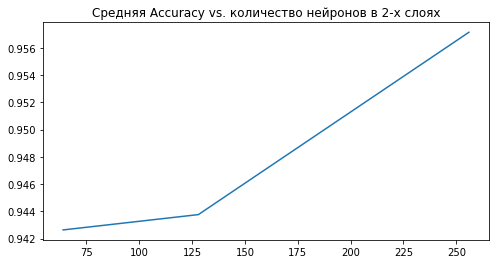

In [17]:
#Посмотрим на графике среднюю accuracy в зависимости от количества нейронов в скрытом слою
plt.figure(figsize=(8,4))
plt.title("Средняя Accuracy vs. количество нейронов в 2-х слоях")
plt.plot(neurons_cut, nn_two_accuracy)

In [18]:
nn_two_accuracy

[0.9426386183975266, 0.9437627036629075, 0.9571404416551045]

**Вывод**<br>
Использование 2 скрытых слоев улучшило нашу простую точность до 95%. <br>
Использование 4-х кратной перекрестной проверки дает уверенность что увеличение в точности на 1 % вызвано<br>
добавление второго слоя, нежели переобучением.<br>

<p style="font-family: Arial; font-size:2em;color:blue; font-style:bold"><br>
Нейронная сеть с тремя скрытыми слоями
</p><br> 

Добавим третий скрытый слой в сеть, на этот раз уменьшим количество нейронов в каждом слою

In [37]:
#Установим количество нейронов от 10 до 128, с тем же количеством фолдов в кросс-валидации
neurons_three_nn = [10, 64, 128]
nn_three_accuracy = []
for n in neurons_cut:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n,n))
    accuracy_ar = cross_val_score(mlp, features,targets, cv=4)
    nn_three_accuracy.append(np.mean(accuracy_ar))

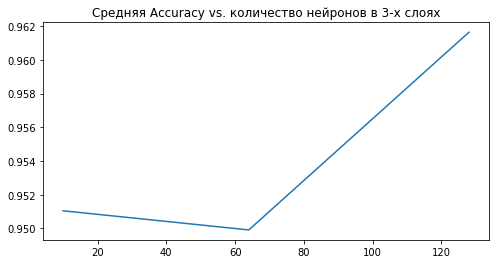

In [38]:
#Посмотрим на графике среднюю accuracy в зависимости от количества нейронов в скрытом слоях
plt.figure(figsize=(8,4))
plt.title("Средняя Accuracy vs. количество нейронов в 3-х слоях")
plt.plot(neurons_three_nn, nn_three_accuracy)

In [39]:
nn_three_accuracy

[0.9510436523661636, 0.9499087048554623, 0.9616433132375957]

**Вывод**<br>
Использование 3 скрытых слоев улучшило нашу простую точность до 96% , что это соответствует идеи,<br>
что наличие большего количества слоев и большего количества нейронов имеет тенденцию улучшать производительность сети.

<p style="font-family: Arial; font-size:1.8em;color:blue; font-style:bold"><br>
Визуализация точности модели
</p><br> 

In [40]:
#Разделим сет на тренировочный и тестовый
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,targets)

In [41]:
# Инициируем модель с тремя скрытыми слоями и одинаковым числом нейронов на каждом слою
from sklearn.metrics import confusion_matrix
clf = MLPClassifier(hidden_layer_sizes=(128,128,128))
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128, 128, 128), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [42]:
#Используем confusion матрицу для визуализации точности прогноза модели
import seaborn as sns
nn_predictions = clf.predict(X_test)
matrix = confusion_matrix(y_test, nn_predictions)

(0, 10)

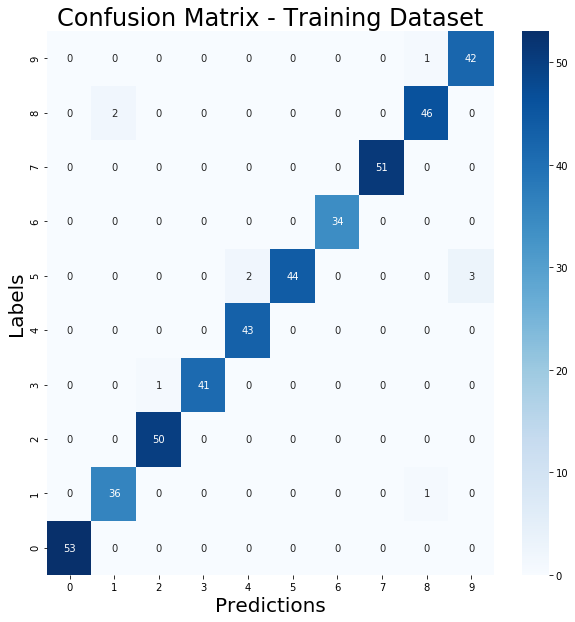

In [43]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=matrix, annot=True, cmap='Blues',fmt=f'.0f')
plt.title('Confusion Matrix - Training Dataset', size=24)
plt.xlabel('Predictions', size=20);
plt.ylabel('Labels', size=20);
plt.ylim(0,10)

Как видно в подавляющем большинстве случаев модель почти идеально предсказала результат(label)

<p style="font-family: Arial; font-size:1.8em;color:blue; font-style:bold"><br>
Заключение
</p><br> 

Метод К ближайщих соседей неплохо справляется с задачей классификации рукописных цифр, однако при большом объеме признаков и 
наблюдений, процесс классификации будет занимать весьма продолжительное время,так как модель не строит никакой математической модели.<br>
С другой стороны модель нейронной сети многослойного персептона (MLP) способна давать почти 100 % правильные прогнозы при правильном подборе ее параметров(количество слоев и нейронов в каждом), используя при этом линейную модель и захватывая нелинейные зависимости в скрытых слоях.<br> Все это дает большое преимущество перед методом К соседей